Starter file for Project 1 - need to load in Spotify CSV!


In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
csv_path = Path("Resources/spotify-2023.csv")

spotify_df = pd.read_csv(csv_path, encoding='iso-8859-1')

#Basic Dataframe with all information
spotify_df.head()

,track_name,Artist Name 1,Artist Name 2,Artist Name 3,Artist Name 4,Artist Name 5,Artist Name 6,Artist Name 7,Artist Name 8,artist_count,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,NaN,NaN,NaN,NaN,NaN,NaN,2,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# David!

In [4]:
#bucket to store the artists names as a list
artist_list = []

#columns into lists and drop the NA values
artist1_list = spotify_df["Artist Name 1"].dropna().tolist()
artist2_list = spotify_df["Artist Name 2"].dropna().tolist()
artist3_list = spotify_df["Artist Name 3"].dropna().tolist()
artist4_list = spotify_df["Artist Name 4"].dropna().tolist()
artist5_list = spotify_df["Artist Name 5"].dropna().tolist()
artist6_list = spotify_df["Artist Name 6"].dropna().tolist()
artist7_list = spotify_df["Artist Name 7"].dropna().tolist()
artist8_list = spotify_df["Artist Name 8"].dropna().tolist()

#compile the lists
artist_list.extend(artist1_list)
artist_list.extend(artist2_list)
artist_list.extend(artist3_list)
artist_list.extend(artist4_list)
artist_list.extend(artist5_list)
artist_list.extend(artist6_list)
artist_list.extend(artist7_list)
artist_list.extend(artist8_list)

artist_list

['Latto',
 'Myke Towers',
 'Olivia Rodrigo',
 'Taylor Swift',
 'Bad Bunny',
 'Dave',
 'Eslabon Armado',
 'Quevedo',
 'Gunna',
 'Peso Pluma',
 'Bad Bunny',
 'NewJeans',
 'Miley Cyrus',
 'David Kushner',
 'Harry Styles',
 'SZA',
 'Fifty Fifty',
 'Billie Eilish',
 'Feid',
 'Jimin',
 'Gabito Ballesteros',
 'Taylor Swift',
 'Arctic Monkeys',
 'Bizarrap',
 'The Weeknd',
 'Fuerza Regida',
 'Rema',
 'Tainy',
 'Morgan Wallen',
 'Dua Lipa',
 'Troye Sivan',
 'Peso Pluma',
 'The Weeknd',
 'Taylor Swift',
 'Karol G',
 'Big One',
 'Yahritza Y Su Esencia',
 'Taylor Swift',
 'Taylor Swift',
 'Fuerza Regida',
 'Junior H',
 'Post Malone',
 'Bebe Rexha',
 'Tyler',
 'Nicki Minaj',
 'Miley Cyrus',
 'OneRepublic',
 'The Weeknd',
 'The Weeknd',
 'Ariana Grande',
 'Feid',
 'David Guetta',
 'Karol G',
 'Peggy Gou',
 'Tom Odell',
 'The Weeknd',
 'Kali Uchis',
 'Manuel Turizo',
 'Karol G',
 'Taylor Swift',
 'dennis',
 'PinkPantheress',
 'Charlie Puth',
 'Rauw Alejandro',
 'Ozuna',
 'Chris Molitor',
 'Taylor Swif

In [5]:
# Number of artists in the sample
print(len(artist_list))

1482


In [6]:
# Number of songs in the sample
counter = 0
for row in spotify_df["track_name"]:
   counter = counter + 1
counter   

952

In [7]:
# DF of the full artist list
all_artists_df = pd.DataFrame(artist_list)

# Clean up data / DF
all_artists_df.columns = ["Artist"]
all_artists_df["Artist"].replace({" Bad Bunny": "Bad Bunny"}, inplace=True)

all_artists_df.head(10)

,Artist
0,Latto
1,Myke Towers
2,Olivia Rodrigo
3,Taylor Swift
4,Bad Bunny
5,Dave
6,Eslabon Armado
7,Quevedo
8,Gunna
9,Peso Pluma


In [8]:
# Unique artists in the sample
print(len(all_artists_df.value_counts()))

802


In [9]:
# Sorted by most common and update DF
sorted_df = all_artists_df.value_counts().sort_values(ascending=False)
count_sorted_df = pd.DataFrame(sorted_df)

count_sorted_df.head(10)

,count
Artist,
Bad Bunny,41
Taylor Swift,36
The Weeknd,34
SZA,23
Kendrick Lamar,23
Drake,19
Harry Styles,17
Feid,15
Ed Sheeran,13


In [10]:
#limit the list to only the top 5
topfive_df = count_sorted_df.loc[(count_sorted_df["count"] >= 20)]

#add back the index
topfive_df.reset_index(inplace=True)

topfive_df

,Artist,count
0,Bad Bunny,41
1,Taylor Swift,36
2,The Weeknd,34
3,SZA,23
4,Kendrick Lamar,23


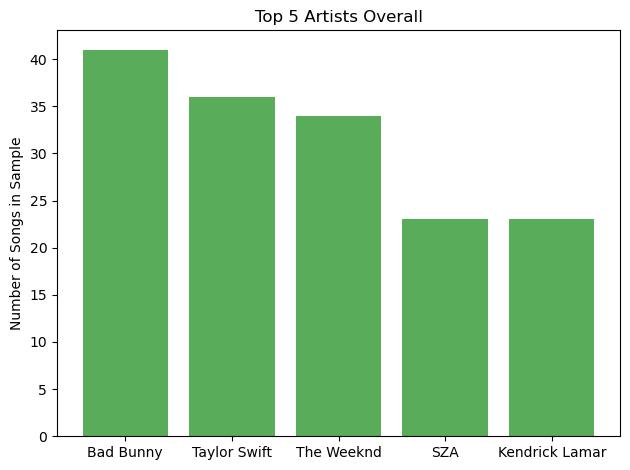

In [12]:
# bar chart 
x_axis = np.arange(len(topfive_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, topfive_df["count"], color='g', alpha=0.65, align="center")
plt.xticks(tick_locations, topfive_df["Artist"], rotation="horizontal")

plt.title("Top 5 Artists Overall")
plt.ylabel("Number of Songs in Sample")
plt.tight_layout()

plt.show()

In [15]:
# list out the columns
spotify_df.columns


Index(['track_name', 'Artist Name 1', 'Artist Name 2', 'Artist Name 3',
       'Artist Name 4', 'Artist Name 5', 'Artist Name 6', 'Artist Name 7',
       'Artist Name 8', 'artist_count', 'released_year', 'released_month',
       'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [16]:
# tighten up the df columns that I need
short_spotify_df = spotify_df[["track_name","Artist Name 1","Artist Name 2","Artist Name 3",
                              "Artist Name 4","Artist Name 5","Artist Name 6","Artist Name 7"
                              ,"Artist Name 8", "released_year", "streams"]].copy()
short_spotify_df.head()

,track_name,Artist Name 1,Artist Name 2,Artist Name 3,Artist Name 4,Artist Name 5,Artist Name 6,Artist Name 7,Artist Name 8,released_year,streams
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,NaN,NaN,NaN,NaN,NaN,NaN,2023,141381703
1,LALA,Myke Towers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,133716286
2,vampire,Olivia Rodrigo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,140003974
3,Cruel Summer,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,800840817
4,WHERE SHE GOES,Bad Bunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,303236322


In [17]:
#sorted by streams
sorted_short_df = short_spotify_df.sort_values("streams", ascending=False)
sorted_short_df

,track_name,Artist Name 1,Artist Name 2,Artist Name 3,Artist Name 4,Artist Name 5,Artist Name 6,Artist Name 7,Artist Name 8,released_year,streams
55,Blinding Lights,The Weeknd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,3703895074
179,Shape of You,Ed Sheeran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,3562543890
86,Someone You Loved,Lewis Capaldi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2887241814
619,Dance Monkey,Tones and I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Swae Lee,NaN,NaN,NaN,NaN,NaN,NaN,2018,2808096550
...,...,...,...,...,...,...,...,...,...,...,...
68,Overdrive,Post Malone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,14780425
142,"Gol Bolinha, Gol Quadrado 2",Mc Pedrinho,DJ 900,NaN,NaN,NaN,NaN,NaN,NaN,2023,11956641
144,QUEMA,Sog,Ryan Castro,Peso Pluma,NaN,NaN,NaN,NaN,NaN,2023,11599388
393,Jhoome Jo Pathaan,Arijit Singh,Vishal Dadlani,Sukriti Kakar,Vishal-Shekhar,Shekhar Ravjiani,Kumaar,NaN,NaN,2022,1365184


In [18]:
#DF for streams over 1 billion
one_bill_df = short_spotify_df[(short_spotify_df["streams"] >= 1000000000)]

one_bill_df.count()

track_name       152
Artist Name 1    152
Artist Name 2     42
Artist Name 3      8
Artist Name 4      1
Artist Name 5      0
Artist Name 6      0
Artist Name 7      0
Artist Name 8      0
released_year    152
streams          152
dtype: int64

In [19]:
#bucket to store the artists names with 1 billion streams as a list
onebill_artist_list = []

#columns into lists and drop the NA values
onebill_artist1_list = one_bill_df["Artist Name 1"].dropna().tolist()
onebill_artist2_list = one_bill_df["Artist Name 2"].dropna().tolist()
onebill_artist3_list = one_bill_df["Artist Name 3"].dropna().tolist()
onebill_artist4_list = one_bill_df["Artist Name 4"].dropna().tolist()

#compile the lists
onebill_artist_list.extend(onebill_artist1_list)
onebill_artist_list.extend(onebill_artist2_list)
onebill_artist_list.extend(onebill_artist3_list)
onebill_artist_list.extend(onebill_artist4_list)

onebill_artist_list

['Miley Cyrus',
 'Harry Styles',
 'SZA',
 'Arctic Monkeys',
 'Taylor Swift',
 'Post Malone',
 'Bebe Rexha',
 'Tyler',
 'OneRepublic',
 'The Weeknd',
 'The Weeknd',
 'Tom Odell',
 'The Weeknd',
 'Manuel Turizo',
 'Chris Molitor',
 'Glass Animals',
 'The Neighbourhood',
 'Bizarrap',
 'Coldplay',
 'Sam Smith',
 'Vance Joy',
 'Justin Bieber',
 'Lewis Capaldi',
 'Chencho Corleone',
 'Eminem',
 'Dua Lipa',
 'Ruth B.',
 'Adele',
 'Kendrick Lamar',
 'Tears For Fears',
 'J. Cole',
 'Ray Dalton',
 'Harry Styles',
 'Billie Eilish',
 'Arctic Monkeys',
 'Ed Sheeran',
 'Imagine Dragons',
 'Eminem',
 'Bomba Estereo',
 'Keane',
 'Don Omar',
 'Bruno Mars',
 'OneRepublic',
 'Justin Bieber',
 'Drake',
 'The Weeknd',
 'The Police',
 'Lord Huron',
 'Rihanna',
 'Bruno Mars',
 'Alec Benjamin',
 'Arctic Monkeys',
 'Imagine Dragons',
 'Taylor Swift',
 'Arctic Monkeys',
 'Ed Sheeran',
 'One Direction',
 'Radiohead',
 'Post Malone',
 'Bruno Mars',
 'Hozier',
 'Bad Bunny',
 'Creedence Clearwater Revival',
 'a-ha'

In [20]:
# DF of the full artist list
onebill_artists_df = pd.DataFrame(onebill_artist_list)

# Clean up data / DF
onebill_artists_df.columns = ["Artist"]
onebill_artists_df["Artist"].replace({" Bad Bunny": "Bad Bunny"}, inplace=True)

onebill_artists_df

,Artist
0,Miley Cyrus
1,Harry Styles
2,SZA
3,Arctic Monkeys
4,Taylor Swift
...,...
198,JID
199,Giveon
200,Silk Sonic
201,Arcane


In [21]:
# Unique artists in the sample
print(len(onebill_artists_df.value_counts()))

137


In [22]:
onebill_sorted_df = onebill_artists_df.value_counts().sort_values(ascending=False)
onebill_count_sorted_df = pd.DataFrame(onebill_sorted_df)

onebill_count_sorted_df.head(10)

,count
Artist,
Bad Bunny,8
The Weeknd,6
Ed Sheeran,6
Bruno Mars,5
Eminem,5
Justin Bieber,4
Arctic Monkeys,4
Harry Styles,4
Imagine Dragons,4


In [23]:
#limit the list to only the top 5
onebill_topfive_df = onebill_count_sorted_df.loc[(onebill_count_sorted_df["count"] >= 5)]

#add back the index
onebill_topfive_df.reset_index(inplace=True)

onebill_topfive_df

,Artist,count
0,Bad Bunny,8
1,The Weeknd,6
2,Ed Sheeran,6
3,Bruno Mars,5
4,Eminem,5


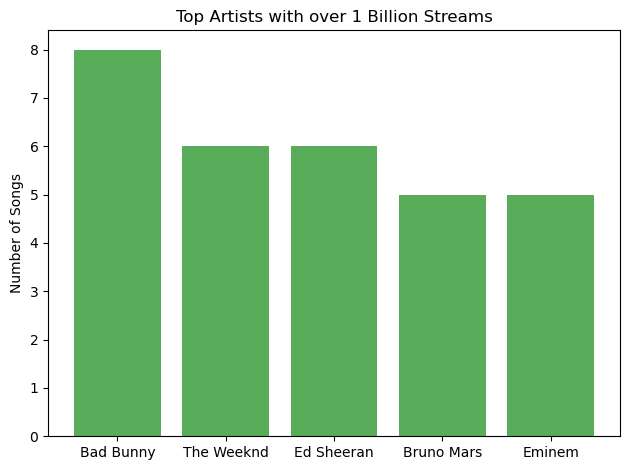

In [24]:
# bar chart 
x_axis = np.arange(len(onebill_topfive_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, onebill_topfive_df["count"], color='g', alpha=0.65, align="center")
plt.xticks(tick_locations, onebill_topfive_df["Artist"], rotation="horizontal")

plt.title("Top Artists with over 1 Billion Streams")
plt.ylabel("Number of Songs")
plt.tight_layout()

plt.show()

In [25]:
two_bill_df = short_spotify_df[(short_spotify_df["streams"] >= 2000000000)]
two_bill_df.count()

track_name       31
Artist Name 1    31
Artist Name 2     9
Artist Name 3     1
Artist Name 4     0
Artist Name 5     0
Artist Name 6     0
Artist Name 7     0
Artist Name 8     0
released_year    31
streams          31
dtype: int64

In [26]:
#bucket to store the artists names with 2 billion streams as a list
twobill_artist_list = []

#columns into lists and drop the NA values
twobill_artist1_list = two_bill_df["Artist Name 1"].dropna().tolist()
twobill_artist2_list = two_bill_df["Artist Name 2"].dropna().tolist()
twobill_artist3_list = two_bill_df["Artist Name 3"].dropna().tolist()

#compile the lists
twobill_artist_list.extend(twobill_artist1_list)
twobill_artist_list.extend(twobill_artist2_list)
twobill_artist_list.extend(twobill_artist3_list)

twobill_artist_list

['Harry Styles',
 'Post Malone',
 'The Weeknd',
 'The Weeknd',
 'Glass Animals',
 'The Neighbourhood',
 'Vance Joy',
 'Justin Bieber',
 'Lewis Capaldi',
 'Harry Styles',
 'Billie Eilish',
 'Ed Sheeran',
 'Imagine Dragons',
 'OneRepublic',
 'Drake',
 'Ed Sheeran',
 'Post Malone',
 'Hozier',
 'James Arthur',
 'Dua Lipa',
 'Tones and I',
 'Juice WRLD',
 'John Legend',
 'Lady Gaga',
 'Ed Sheeran',
 'Shawn Mendes',
 'Queen',
 'The Chainsmokers',
 'The Chainsmokers',
 'Ed Sheeran',
 'Justin Bieber',
 ' Swae Lee',
 ' Daft Punk',
 ' The Kid Laroi',
 ' Khalid',
 ' WizKid',
 ' Bradley Cooper',
 ' Camila Cabello',
 ' Coldplay',
 ' Halsey',
 ' Kyla']

In [27]:
# DF of the full artist list
twobill_artists_df = pd.DataFrame(twobill_artist_list)

# Clean up data / DF
twobill_artists_df.columns = ["Artist"]
twobill_artists_df["Artist"].replace({" Bad Bunny": "Bad Bunny"}, inplace=True)

twobill_artists_df.head()

,Artist
0,Harry Styles
1,Post Malone
2,The Weeknd
3,The Weeknd
4,Glass Animals


In [28]:
# Unique artists in the sample
print(len(twobill_artists_df.value_counts()))

33


In [29]:
twobill_sorted_df = twobill_artists_df.value_counts().sort_values(ascending=False)
twobill_count_sorted_df = pd.DataFrame(twobill_sorted_df)

twobill_count_sorted_df.head(10)

,count
Artist,
Ed Sheeran,4
Harry Styles,2
The Weeknd,2
The Chainsmokers,2
Justin Bieber,2
Post Malone,2
The Kid Laroi,1
Dua Lipa,1
Drake,1


In [30]:
#limit the list to only the top 6
twobill_topfive_df = twobill_count_sorted_df.loc[(twobill_count_sorted_df["count"] >= 2)]

#add back the index
twobill_topfive_df.reset_index(inplace=True)

twobill_topfive_df

,Artist,count
0,Ed Sheeran,4
1,Harry Styles,2
2,The Weeknd,2
3,The Chainsmokers,2
4,Justin Bieber,2
5,Post Malone,2


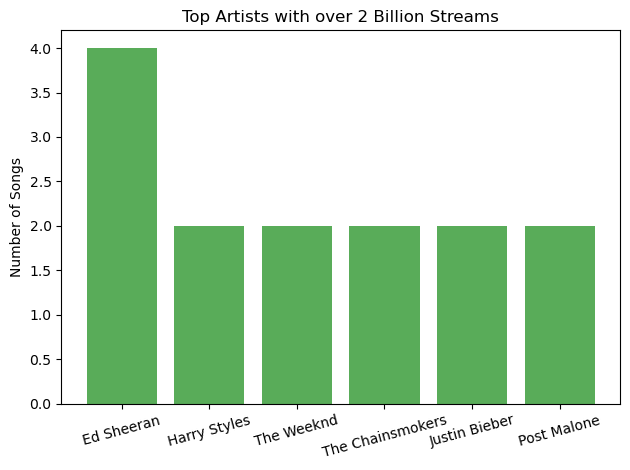

In [31]:
# bar chart 
x_axis = np.arange(len(twobill_topfive_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, twobill_topfive_df["count"], color='g', alpha=0.65, align="center")
plt.xticks(tick_locations, twobill_topfive_df["Artist"], rotation=15)

plt.title("Top Artists with over 2 Billion Streams")
plt.ylabel("Number of Songs")
plt.tight_layout()

plt.show()

In [32]:
# new copy for scatters
scatter1_df = sorted_short_df.copy()
# sort lowest to highest streams
scatter2_df = scatter1_df.sort_values("streams", ascending=True)
# add a list of numbers
scatter2_df.insert(0, "New_Count", range(1, 1 + len(scatter1_df)))
scatter2_df.head()


,New_Count,track_name,Artist Name 1,Artist Name 2,Artist Name 3,Artist Name 4,Artist Name 5,Artist Name 6,Artist Name 7,Artist Name 8,released_year,streams
123,1,Que Vuelvas,Carin Leon,Grupo Frontera,NaN,NaN,NaN,NaN,NaN,NaN,2022,2762
393,2,Jhoome Jo Pathaan,Arijit Singh,Vishal Dadlani,Sukriti Kakar,Vishal-Shekhar,Shekhar Ravjiani,Kumaar,NaN,NaN,2022,1365184
144,3,QUEMA,Sog,Ryan Castro,Peso Pluma,NaN,NaN,NaN,NaN,NaN,2023,11599388
142,4,"Gol Bolinha, Gol Quadrado 2",Mc Pedrinho,DJ 900,NaN,NaN,NaN,NaN,NaN,NaN,2023,11956641
68,5,Overdrive,Post Malone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,14780425


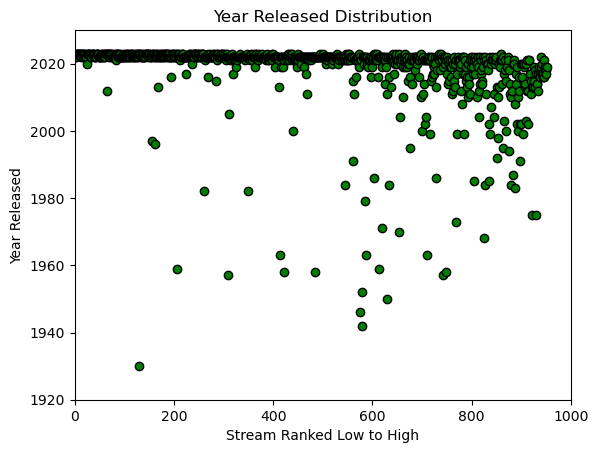

In [33]:
#Scatter for year
plt.scatter(scatter2_df["New_Count"], scatter2_df["released_year"], marker="o", 
            facecolors="green", edgecolors="black")

plt.ylim(1920,2030)
plt.xlim(0,1000)
plt.title("Year Released Distribution")
plt.xlabel("Stream Ranked Low to High")
plt.ylabel("Year Released")
plt.show()

In [34]:
# repeat process for the 1 billion DF
one_bill_scatter_df = one_bill_df.copy()
one_bill_scatter_df = one_bill_scatter_df.sort_values("streams", ascending=True)
one_bill_scatter_df.insert(0, "New_Count", range(1, 1 + len(one_bill_scatter_df)))
one_bill_scatter_df.head()

,New_Count,track_name,Artist Name 1,Artist Name 2,Artist Name 3,Artist Name 4,Artist Name 5,Artist Name 6,Artist Name 7,Artist Name 8,released_year,streams
500,1,abcdefu,Gayle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,1007612429
366,2,Revenge,XXXTENTACION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,1022258230
749,3,Falling,Harry Styles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,1023187129
424,4,Running Up That Hill (A Deal With God),Kate Bush,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,1024858327
518,5,Need To Know,Doja Cat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,1042568408


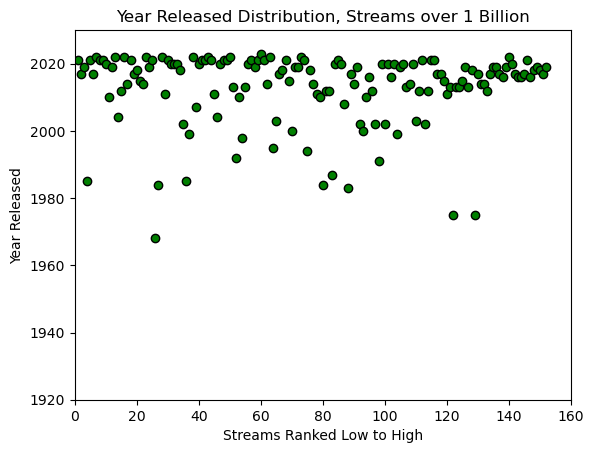

In [35]:
# one_bill_df.head()
#Scatter for year
plt.scatter(one_bill_scatter_df["New_Count"], one_bill_scatter_df["released_year"], marker="o", 
            facecolors="green", edgecolors="black")

plt.ylim(1920,2030)
plt.xlim(0,160)
plt.title("Year Released Distribution, Streams over 1 Billion")
plt.xlabel("Streams Ranked Low to High")
plt.ylabel("Year Released")
plt.show()

In [36]:
# repeat process for the 2 billion DF
two_bill_scatter_df = two_bill_df.copy()
two_bill_scatter_df = two_bill_scatter_df.sort_values("streams", ascending=True)
two_bill_scatter_df.insert(0, "New_Count", range(1, 1 + len(two_bill_scatter_df)))
two_bill_scatter_df.head()

,New_Count,track_name,Artist Name 1,Artist Name 2,Artist Name 3,Artist Name 4,Artist Name 5,Artist Name 6,Artist Name 7,Artist Name 8,released_year,streams
80,1,Riptide,Vance Joy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975,2009094673
157,2,Counting Stars,OneRepublic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,2011464183
622,3,All of Me,John Legend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,2086124197
761,4,Love Yourself,Justin Bieber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2123309722
187,5,Circles,Post Malone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2132335812


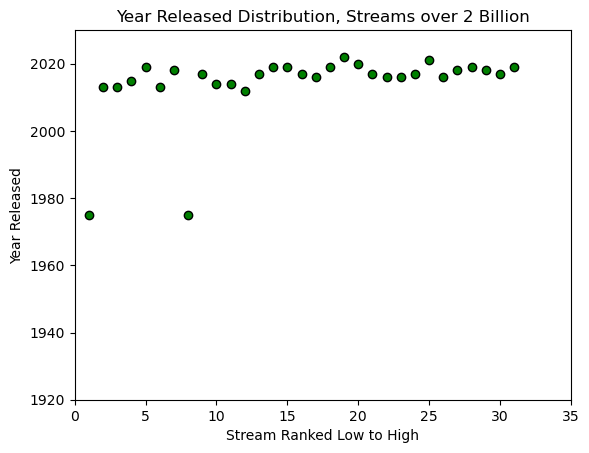

In [37]:
#Scatter for year of 2 billion streams
plt.scatter(two_bill_scatter_df["New_Count"], two_bill_scatter_df["released_year"], marker="o", 
            facecolors="green", edgecolors="black")

plt.ylim(1920,2030)
plt.xlim(0,35)
plt.title("Year Released Distribution, Streams over 2 Billion")
plt.xlabel("Stream Ranked Low to High")
plt.ylabel("Year Released")
plt.show()

In [72]:
# new DF for the bins
bins_spotify_df = sorted_short_df.copy()
# Create the bins in which Data will be held  
bins = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2019, 2020, 2021, 2022, 2023]

# Create the names for the bins
group_names = ["1930s","1940s","1950s","1960s","1970s","1980s","1990s","2000s","2010s","2020","2021","2022","2023"]

In [73]:
bins_spotify_df["timeframe"] = pd.cut(bins_spotify_df["released_year"], 
                                              bins, labels=group_names, 
                                              include_lowest=True)

bins_spotify_df

,track_name,Artist Name 1,Artist Name 2,Artist Name 3,Artist Name 4,Artist Name 5,Artist Name 6,Artist Name 7,Artist Name 8,released_year,streams,timeframe
55,Blinding Lights,The Weeknd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,3703895074,2010s
179,Shape of You,Ed Sheeran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,3562543890,2010s
86,Someone You Loved,Lewis Capaldi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2887241814,2010s
619,Dance Monkey,Tones and I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,2864791672,2010s
41,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Swae Lee,NaN,NaN,NaN,NaN,NaN,NaN,2018,2808096550,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...
68,Overdrive,Post Malone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,14780425,2023
142,"Gol Bolinha, Gol Quadrado 2",Mc Pedrinho,DJ 900,NaN,NaN,NaN,NaN,NaN,NaN,2023,11956641,2023
144,QUEMA,Sog,Ryan Castro,Peso Pluma,NaN,NaN,NaN,NaN,NaN,2023,11599388,2023
393,Jhoome Jo Pathaan,Arijit Singh,Vishal Dadlani,Sukriti Kakar,Vishal-Shekhar,Shekhar Ravjiani,Kumaar,NaN,NaN,2022,1365184,2022


In [74]:
# bins_spotify_df.sort_values(by="timeframe", ascending=True)
newbins_spotify_df = bins_spotify_df["timeframe"].value_counts()
newbins_df = pd.DataFrame(newbins_spotify_df)

#add back the index, sort values
newbins_df.reset_index(inplace=True)
newbins_df.sort_values(by='timeframe', ascending=True, inplace=True)
newbins_df

,timeframe,count
12,1930s,1
11,1940s,3
8,1950s,8
9,1960s,5
10,1970s,5
7,1980s,12
6,1990s,18
5,2000s,23
2,2010s,144
4,2020,37


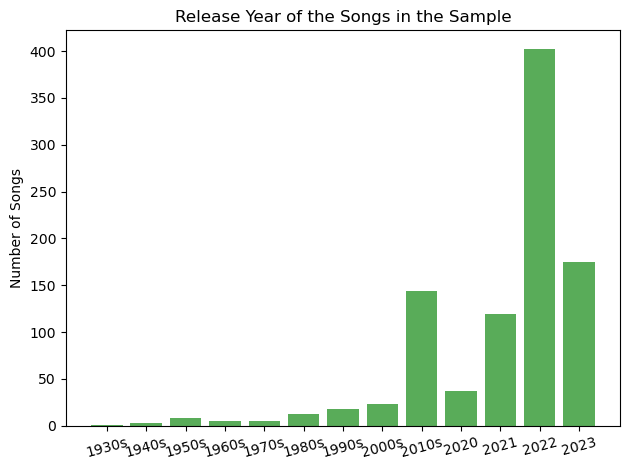

In [75]:
# bar chart 
x_axis = np.arange(len(newbins_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, newbins_df["count"], color='g', alpha=0.65, align="center")
plt.xticks(tick_locations, newbins_df["timeframe"], rotation=15)

plt.title("Release Year of the Songs in the Sample")
plt.ylabel("Number of Songs")
plt.tight_layout()

plt.show()

In [76]:
# only streams over 1 billion
bins_one_bill_df = bins_spotify_df[(bins_spotify_df["streams"] >= 1000000000)]

# value counts and new DF
newbins_1bill_spotify_df = bins_one_bill_df["timeframe"].value_counts()
newbins_1bill_df = pd.DataFrame(newbins_1bill_spotify_df)

#add back the index, sort values
newbins_1bill_df.reset_index(inplace=True)
newbins_1bill_df.sort_values(by='timeframe', ascending=True, inplace=True)
newbins_1bill_df

,timeframe,count
10,1930s,0
11,1940s,0
12,1950s,0
8,1960s,1
7,1970s,2
6,1980s,6
5,1990s,9
2,2000s,15
0,2010s,70
3,2020,15


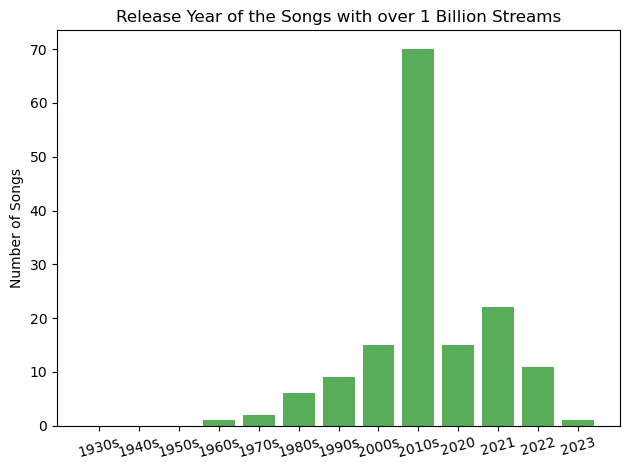

In [77]:
# bar chart 
x_axis = np.arange(len(newbins_1bill_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, newbins_1bill_df["count"], color='g', alpha=0.65, align="center")
plt.xticks(tick_locations, newbins_1bill_df["timeframe"], rotation=15)

plt.title("Release Year of the Songs with over 1 Billion Streams")
plt.ylabel("Number of Songs")
plt.tight_layout()

plt.show()

In [78]:
bins_two_bill_df = bins_spotify_df[(bins_spotify_df["streams"] >= 2000000000)]

# value counts and new DF
newbins_2bill_spotify_df = bins_two_bill_df["timeframe"].value_counts()
newbins_2bill_df = pd.DataFrame(newbins_2bill_spotify_df)

#add back the index, sort values
newbins_2bill_df.reset_index(inplace=True)
newbins_2bill_df.sort_values(by='timeframe', ascending=True, inplace=True)
newbins_2bill_df

,timeframe,count
5,1930s,0
6,1940s,0
7,1950s,0
8,1960s,0
1,1970s,2
9,1980s,0
10,1990s,0
11,2000s,0
0,2010s,26
2,2020,1


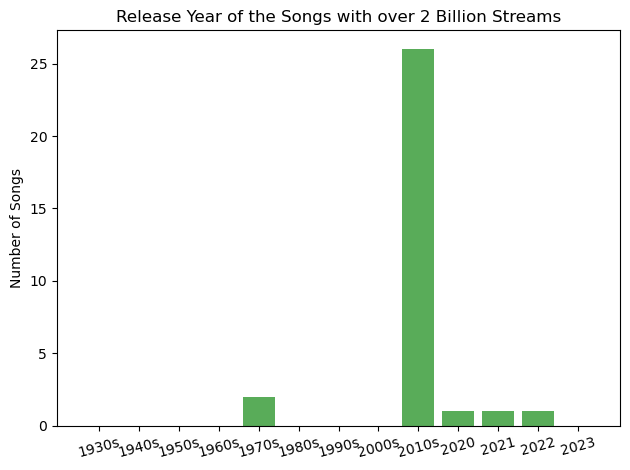

In [79]:
# bar chart 
x_axis = np.arange(len(newbins_2bill_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, newbins_2bill_df["count"], color='g', alpha=0.65, align="center")
plt.xticks(tick_locations, newbins_2bill_df["timeframe"], rotation=15)

plt.title("Release Year of the Songs with over 2 Billion Streams")
plt.ylabel("Number of Songs")
plt.tight_layout()

plt.show()

In [ ]:
#Austin!

In [ ]:
#Dan